In [9]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

# 차원 축소

## PCA
- 주성분 분석
- 데이터들의 변동량을 파악하여 결과 데이터와 밀접한 관련을 가지고 있는 데이터를 중심으로 압축하는 차원축소
- 변동량이 가장 많은 데이터를 기준으로 압축하기 때문에 데이터 시각화 할 때 주성분만 모아 시각화 할 수 있다.
- 다차원 데이터를 한 좌표 평면에 시각화 할때 사용한다.

### 데이터 불러오기

In [2]:
iris_df = pd.read_csv('dataset/iris.csv', header=None)
iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


[]

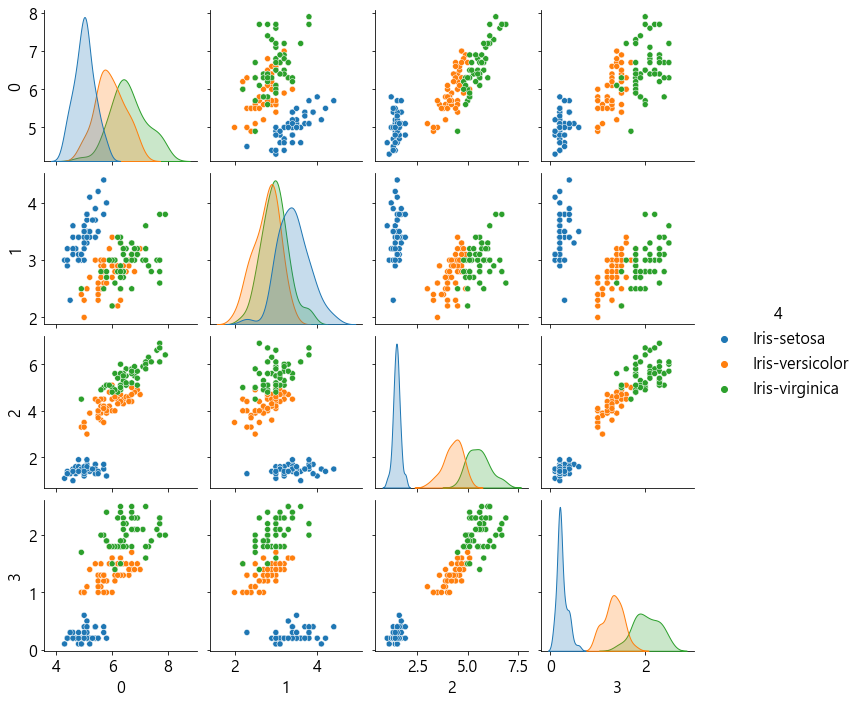

In [3]:
sns.pairplot(iris_df, hue=4)
plt.plot()

In [5]:
pca = PCA(n_components=2)

# 결과 데이터 제거 후 학습
x =  iris_df.drop(4, axis=1)
pca.fit(x)

# 데이터 변환
r1 = pca.transform(x)

In [6]:
pca_df = pd.DataFrame(r1, columns=['p1','p2'])
pca_df['target'] = iris_df[4]
pca_df.head()

,p1,p2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


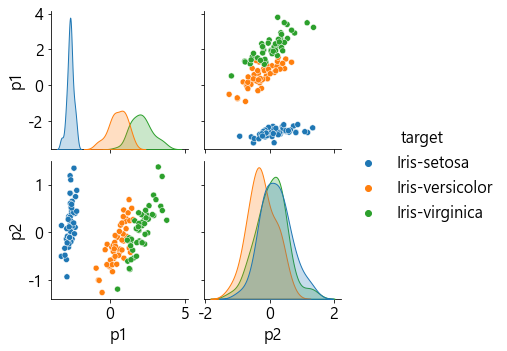

In [7]:
sns.pairplot(pca_df, hue='target')
plt.show()

## LDA (분류에서만 사용)
- PCA : 변동량이 가장 많은 컬럼을 기준으로 축을 찾아 투영하기 때문에 결과 데이터가 섞여 있는 형태로 압축될 수 있다.
- LDA : 결과데이터들이 가장 잘 구분될 수 있는 축을 찾아 투영하기 때문에 PCA보다 더 잘 학습될 가능성이 있다.

In [10]:
iris_df1 = pd.read_csv('dataset/iris.csv', header=None)
iris_df1.columns = ['a1','a2','a3','a4','target']
iris_df1.head()

,a1,a2,a3,a4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 입력과 결과를 나눈다.

In [11]:
x = iris_df1.drop('target', axis=1)
y = iris_df1['target']

### 문자열을 숫자로 변환

In [12]:
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### pca로 압축

In [14]:
pca = PCA(n_components=2)
pca.fit(x) # 주성분만
pca_x = pca.transform(x)

### LDA

In [25]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x,y) # 주성분과 결과데이터
lda_x = lda.transform(x)

### 학습모델 생성하여 적용하기

In [26]:
model1 = XGBClassifier(silent =True, verbosity=0) # 원본 데이터
model2 = XGBClassifier(silent =True, verbosity=0) # PCA 적용 데이터
model3 = XGBClassifier(silent =True, verbosity=0) # LDA 적용 데이터

In [27]:
# 교차검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1,x,y, scoring='accuracy',cv=kfold)
r2 = cross_val_score(model2,pca_x,y, scoring='accuracy',cv=kfold)
r3 = cross_val_score(model3,lda_x,y, scoring='accuracy',cv=kfold)

In [29]:
print(r1.mean()) # 원본 데이터
print(r2.mean()) # PCA 적용 데이터
print(r3.mean()) # LDA 적용 데이터

0.9333333333333333
0.9666666666666668
0.9733333333333334


### 전체 데이터를 학습시킨다.

In [30]:
model1.fit(x,y)
model2.fit(pca_x,y)
model3.fit(lda_x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

### 학습한 데이터로 예측 결과 추출

In [31]:
pred1 = model1.predict(x)
pred2 = model2.predict(pca_x)
pred3 = model3.predict(lda_x)

In [33]:
r_1 = accuracy_score(y,pred1)
r_2 = accuracy_score(y,pred2)
r_3 = accuracy_score(y,pred3)

print(r_1)
print(r_2)
print(r_3)

1.0
1.0
1.0
